In [76]:
from google.colab import drive # mounts the google drive for a new notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# load the 2 npy files created by the process_yale_images.ipynb
from numpy import load
import numpy as np
path = '/content/drive/My Drive/'
# load array
y = load(path + 'yaleExtB_target.npy')
X = load(path + 'yaleExtB_data.npy')

In [78]:
from sklearn.model_selection import train_test_split # loads functions from the ML library sklearn
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [79]:
# Number of principal components for PCA
nof_prin_components = 400

nohn = 100

# PCA
pca = PCA (n_components=nof_prin_components, whiten=True)
X_pca = pca.fit_transform(X)

# Initialize MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(nohn,),
    solver='sgd',
    activation='relu',
    batch_size=256,
    max_iter=1000,
    learning_rate_init=0.05,
    momentum=0.9,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=True
)


# Standardize the features after PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)


In [80]:
# Number of splits for k-fold cross-validation
k_fold_splits = 5

# Initialize KFold with shuffling
kf = KFold(n_splits=k_fold_splits, shuffle=True, random_state=42)

# Create MLP model
mlp = MLPClassifier()  # You might want to customize parameters here

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Perform k-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a new MLP model for each fold
    mlp_fold = MLPClassifier()  # You might want to customize parameters here

    # Train the MLP model
    mlp_fold.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp_fold.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Print information for each fold
    print(f"Fold {fold}:")
    print(f"  Train samples: {len(train_index)}, Test samples: {len(test_index)}")
    print(f"  Accuracy: {accuracy:.4f}")

    # Additional information
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")

    print()

# Calculate the average accuracy across all folds
average_accuracy = np.mean(accuracy_scores)

print(f'Average Accuracy across {k_fold_splits}-fold cross-validation: {average_accuracy}')


Fold 1:
  Train samples: 1200, Test samples: 300
  Accuracy: 0.8767
  Classification Report:
              precision    recall  f1-score   support

         2.0       1.00      0.88      0.93         8
         3.0       1.00      1.00      1.00        12
         4.0       0.73      1.00      0.84         8
         5.0       0.75      0.86      0.80         7
         6.0       1.00      1.00      1.00        12
         7.0       0.90      1.00      0.95         9
         8.0       0.80      0.89      0.84         9
         9.0       0.90      0.82      0.86        11
        11.0       0.82      0.64      0.72        14
        12.0       1.00      0.57      0.73        14
        13.0       0.75      0.50      0.60         6
        15.0       0.92      1.00      0.96        11
        16.0       0.90      0.90      0.90        10
        17.0       1.00      0.60      0.75         5
        18.0       0.82      0.90      0.86        10
        20.0       0.73      0.89      0.8

[Documentation of ML sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

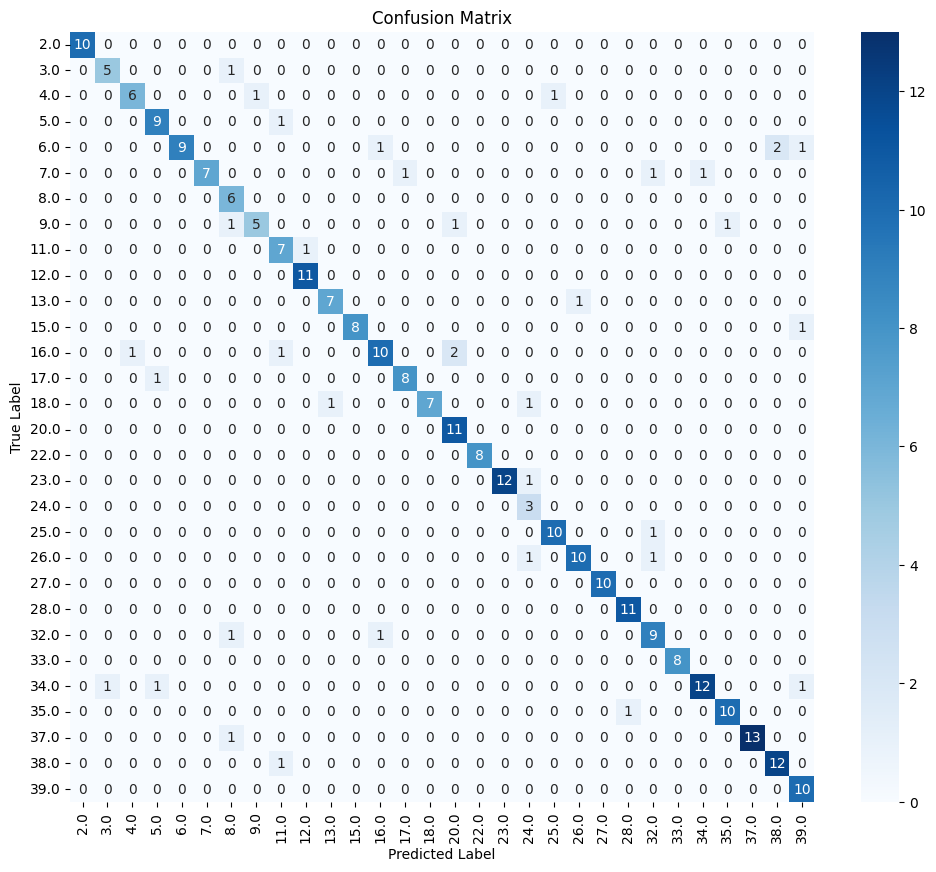

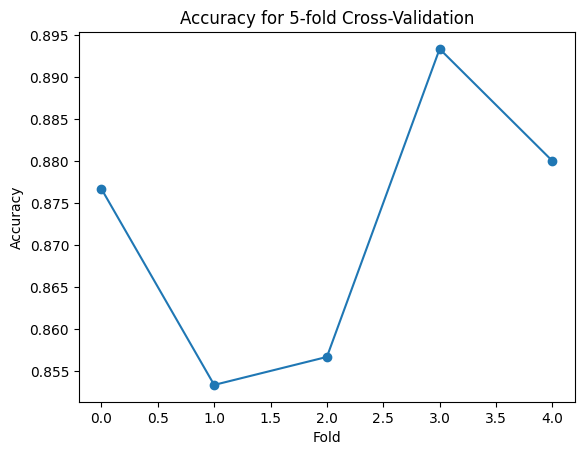

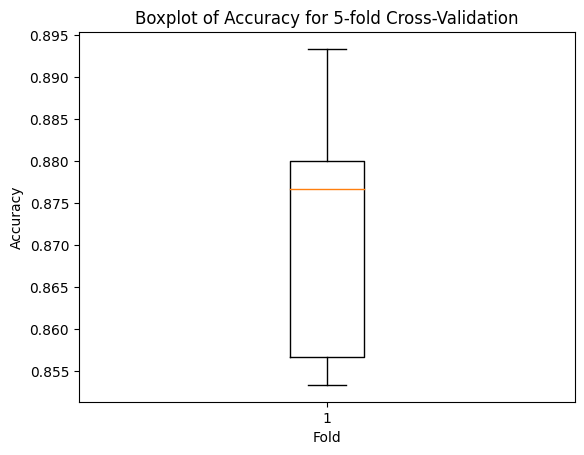

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)



plt.figure(figsize =(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.plot(accuracy_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title(f'Accuracy for {k_fold_splits}-fold Cross-Validation')
plt.show()


plt.boxplot(accuracy_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title(f'Boxplot of Accuracy for {k_fold_splits}-fold Cross-Validation')
plt.show()